In [1]:
# standard modules
import seaborn as sns
import pandas as pd
import numpy as np
import os
#import math

# Modules for Displaying Figures
import matplotlib.pyplot as plt
import scipy.stats as stats


# Data Science Modules 
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# My modules
import src.acquire as ac
import src.prepare as pp
import src.helper as helper
import src.evaluate as evaluate

# Turn off the red warnings
import warnings
warnings.filterwarnings("ignore")

The following datasets are available:
telco


In [2]:
# begin gathering our data and transforming it to useful for analysis
telco = ac.get_telco_data()
train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test = pp.model_telco_data(telco)
base = evaluate.baseline(telco, 'churn')

## Our Problem is the firm we are examining has customers leaving. This is referred to as 'churn.' We know that customers leave, but the firm would like to understand why it is that they leave. While customers can leave for any reason at any time, there are factors which will influence their choice to leave. This presentation will seek to understand and predict, to some degree, factors that the telco firm has control over which may lead to customers leaving them. 

### Hypothesis from theory:
- tenure will have negative correlation with churning (longer a customer, less likely to leave)
- price will have a positive correlation with churning (the higher the price, the more likely a person is to leave)

In [3]:
telco.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [4]:
telco.describe()

,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


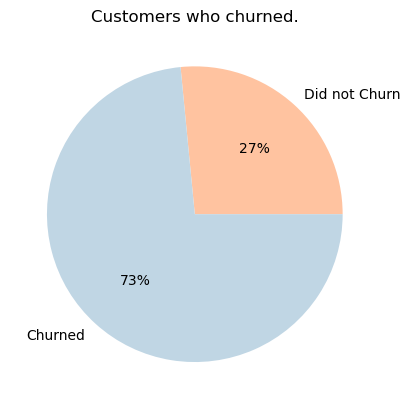

In [5]:
evaluate.make_pie(telco, 'churn')

### Based on our graphic, we can see that a lot of telco's customers churned. This is what we are attempting to investigate.

### Run Tests to determine significance of prospective variables our hypothesis told us were important

#### First, tenure's relationship to churn

In [6]:
t, p = evaluate.get_t_score(telco, 'tenure', 'churn')
print(f't = {t:.2f}')
print(f'p = {p:.2f}')

t = -31.58
p = 0.00


- With this score, there is a zero percent chance of there being a random sampling error. Based on our data, there is relationship between tenure and churn

#### Next, we evaluate the relationship between cost and churn. Monthly charges is the metric which explains how must a customer paid, on average during their tenure with the telco

In [7]:
t, p = evaluate.get_t_score(telco, 'monthly_charges', 'churn')
print(f't = {t:.4f}')
print(f'p = {p:.4f}')

t = 16.5367
p = 0.0000


- With this score, there is a zero percent chance of there being a random sampling error. Based on our data, there is a relationship between monthly charges and churn

### On on modeliing.

- In order to make a machine learning model which is useful, we first determine a benchmark that the model must be able to outperform.

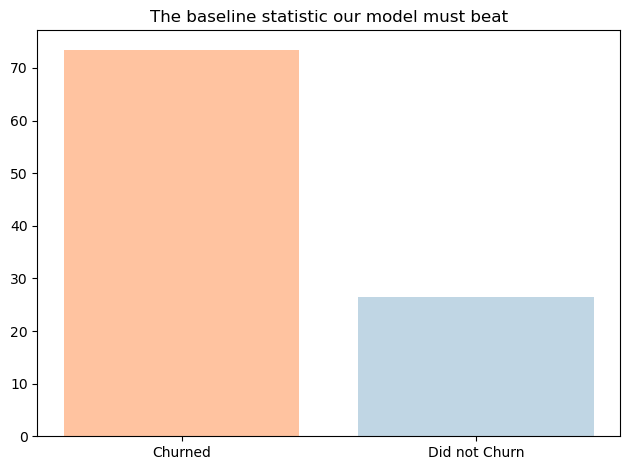

Baseline accuracy is 73.46%


In [8]:
evaluate.baseline_bar(base)
print(f"Baseline accuracy is {round(evaluate.baseline(telco, 'churn')*100,2)}%")

In [9]:
decision_tree = evaluate.decision_tree_model(x_train, y_train, x_test, y_test)
decision_tree

0.7789623312011372

In [10]:
knn = evaluate.knn_model(x_train, y_train, x_test, y_test)

NameError: name 'pd' is not defined